In [1]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [160]:
# load data
df = pd.read_csv("C:/Users/ADMIN/Desktop/Machine Learning/Youtube-videos practice code/P05-Loan status prediction/Loan_Data.csv")
# OR data = pd.read_csv('../P05-Loan status prediction/Loan_Data.csv')

In [161]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

data = pd.read_csv('../P05-Loan status prediction/Loan_Data.csv')

In [4]:
#number of rows and columns
df.shape

(614, 13)

In [5]:
#stats of data
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [6]:
#missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### dealing with missing values

In [7]:
import matplotlib.pyplot as plt

C:\Users\ADMIN\conda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


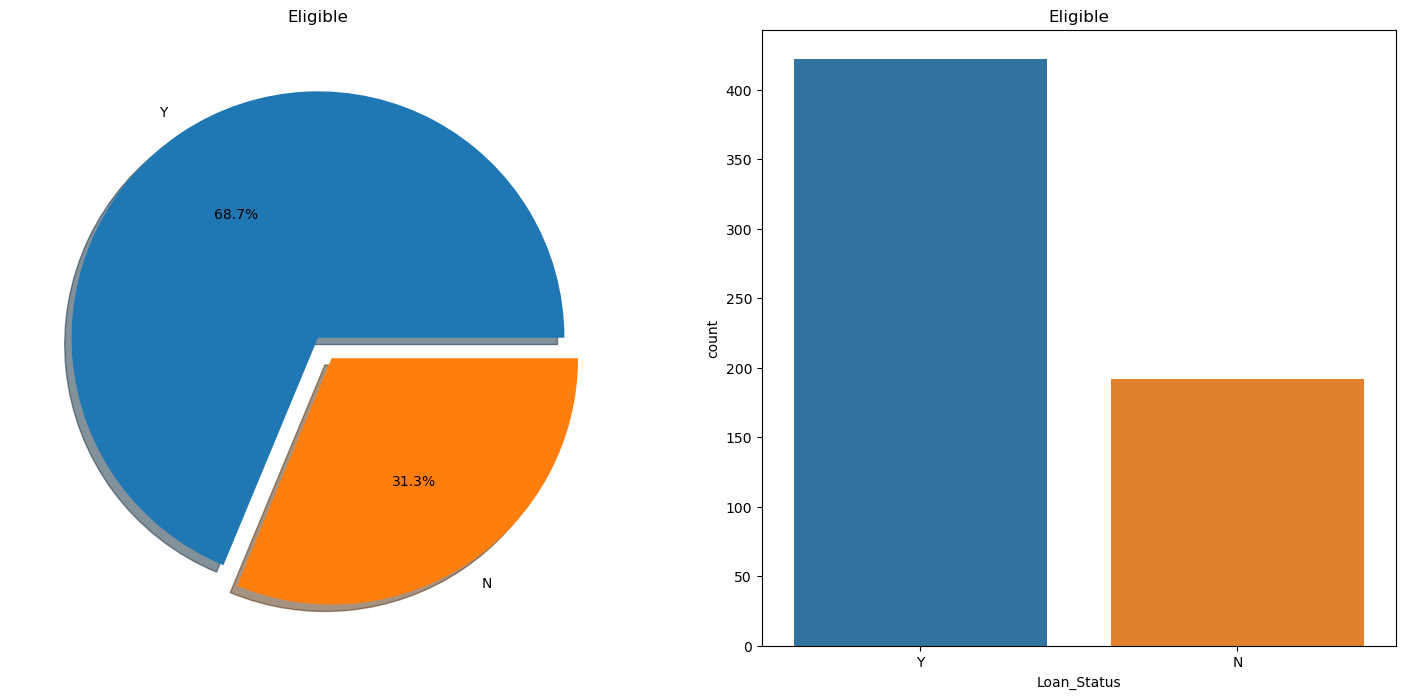

In [9]:
# visualizing loan status
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Eligible')
ax[0].set_ylabel('')
sns.countplot('Loan_Status',data=df,ax=ax[1])
ax[1].set_title('Eligible')
plt.show()

In [10]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
#types of categorical vales
##Gender--> categorical
df.groupby(['Gender','Loan_Status'])['Loan_Status'].count()

Gender  Loan_Status
Female  N               37
        Y               75
Male    N              150
        Y              339
Name: Loan_Status, dtype: int64

In [12]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [27]:
#filling null values in gender with male
df.Gender.fillna('Female',inplace=True)

In [29]:
df.Gender.isnull().sum()

0

In [15]:
df.groupby(['Gender','Married'])['Loan_Status'].count()

Gender  Married
Female  No          80
        Yes         31
Male    No         133
        Yes        367
Name: Loan_Status, dtype: int64

In [16]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [17]:
398-213

185

In [18]:
df.groupby(['Married','Loan_Status'])['Married'].count()

Married  Loan_Status
No       N               79
         Y              134
Yes      N              113
         Y              285
Name: Married, dtype: int64

In [19]:
df.groupby(['Married','Dependents'])['Married'].count()

Married  Dependents
No       0             171
         1              23
         2               8
         3+              7
Yes      0             174
         1              79
         2              93
         3+             44
Name: Married, dtype: int64

In [20]:
df.groupby(['Married','Dependents'])['Dependents'].count()

Married  Dependents
No       0             171
         1              23
         2               8
         3+              7
Yes      0             174
         1              79
         2              93
         3+             44
Name: Dependents, dtype: int64

In [21]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [22]:
df.groupby(['Loan_Status','Married'])['Married'].count()

Loan_Status  Married
N            No          79
             Yes        113
Y            No         134
             Yes        285
Name: Married, dtype: int64

In [31]:
df.Married.isnull().sum()

3

In [34]:
df.Married.dropna(inplace=True)

In [24]:
df.groupby(['Credit_History','Loan_Status'])['Loan_Status'].count()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             N               97
                Y              378
Name: Loan_Status, dtype: int64

In [36]:
df.groupby(['Credit_History','Loan_Status'])['Credit_History'].count()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             N               97
                Y              378
Name: Credit_History, dtype: int64

In [90]:
def handle_nas(df):
    ##for f in df['Loan_Status']:
    if df['Loan_Status'].isin('Y'):
        df.Credit_History= df.Credit_History.fillna(1.0)
    else:
        df.Credit_History= df.Credit_History.fillna(0.0)
    return df
    


In [92]:
df.Loan_Status.value_counts()


1    422
0    192
Name: Loan_Status, dtype: int64

In [25]:
pd.crosstab(df.Credit_History,df.Loan_Status,margins=True).style.background_gradient(cmap='summer_r')

In [94]:
df.dropna(inplace=True)

In [95]:
df

Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
5               5417             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area  Loan_Status  
1               1.0         Rural            0  
2               1.0         Urban            1  
3               1.0         Urban            1  
4               1.0         Urban            1  
5               1.0         Urban            1  
..              ...           ...          ...  
609             1.0         Rural            1  
610             1.0         Rural            1  
611             1.0         Urban            1  
612             1.0         Urban            1  
613             0.0     Semiurban            0  

[492 rows x 13 columns]

In [111]:
df.drop('Loan_ID', axis=1)

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0       0.0      No          0      Graduate            No             5849   
1       0.0     Yes          1      Graduate            No             4583   
2       0.0     Yes          0      Graduate           Yes             3000   
3       0.0     Yes          0  Not Graduate            No             2583   
4       0.0      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609     1.0      No          0      Graduate            No             2900   
610     0.0     Yes         3+      Graduate            No             4106   
611     0.0     Yes          1      Graduate            No             8072   
612     0.0     Yes          2      Graduate            No             7583   
613     1.0      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                  0.0         NaN             360.0             1.0   
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

    Property_Area Loan_Status  
0           Urban           Y  
1           Rural           N  
2           Urban           Y  
3           Urban           Y  
4           Urban           Y  
..            ...         ...  
609         Rural           Y  
610         Rural           Y  
611         Urban           Y  
612         Urban           Y  
613     Semiurban           N  

[614 rows x 12 columns]

In [162]:
df['Gender'] = df['Gender'].replace(['Male','Female'],[0,1])


In [163]:
df['Gender']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
609    1.0
610    0.0
611    0.0
612    0.0
613    1.0
Name: Gender, Length: 614, dtype: float64

In [164]:
df['Married'] = df['Married'].replace(['No','Yes'],[0,1])


In [165]:
df.Married

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
609    0.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Married, Length: 614, dtype: float64

In [166]:
df['Self_Employed'] = df['Self_Employed'].replace(['No','Yes'],[0,1])

In [167]:
df.Self_Employed

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
609    0.0
610    0.0
611    0.0
612    0.0
613    1.0
Name: Self_Employed, Length: 614, dtype: float64

In [127]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [168]:
df['Property_Area'] = df['Property_Area'].replace(['Rural','Semiurban','Urban'],[0,1,2])

In [169]:
df.Property_Area

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 614, dtype: int64

In [170]:
df['Education'] = df['Education'].replace(['Not Graduate','Graduate'],[0,1])

In [171]:
df.Education.unique()

array([1, 0], dtype=int64)

In [172]:
df.Education

0      1
1      1
2      1
3      0
4      1
      ..
609    1
610    1
611    1
612    1
613    1
Name: Education, Length: 614, dtype: int64

In [173]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [174]:
df.drop_duplicates(inplace=True)

In [175]:
df.dropna(inplace=True)

In [176]:
df.drop('Loan_ID',axis=1,inplace=True)

In [177]:
df['Loan_Status'] = df['Loan_Status'].replace(['N','Y'],[0,1])

In [178]:
df

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       0.0      1.0          1          1            0.0             4583   
2       0.0      1.0          0          1            1.0             3000   
3       0.0      1.0          0          0            0.0             2583   
4       0.0      0.0          0          1            0.0             6000   
5       0.0      1.0          2          1            1.0             5417   
..      ...      ...        ...        ...            ...              ...   
609     1.0      0.0          0          1            0.0             2900   
610     0.0      1.0         3+          1            0.0             4106   
611     0.0      1.0          1          1            0.0             8072   
612     0.0      1.0          2          1            0.0             7583   
613     1.0      0.0          0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
5               4196.0       267.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

     Property_Area  Loan_Status  
1                0            0  
2                2            1  
3                2            1  
4                2            1  
5                2            1  
..             ...          ...  
609              0            1  
610              0            1  
611              2            1  
612              2            1  
613              1            0  

[480 rows x 12 columns]

In [179]:
df.Dependents.unique()

array(['1', '0', '2', '3+'], dtype=object)

In [181]:
df['Dependents'] = df['Dependents'].replace('3+', 3)

In [182]:
df.Dependents

1      1
2      0
3      0
4      0
5      2
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 480, dtype: object

In [183]:
df

Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1       0.0      1.0          1          1            0.0             4583   
2       0.0      1.0          0          1            1.0             3000   
3       0.0      1.0          0          0            0.0             2583   
4       0.0      0.0          0          1            0.0             6000   
5       0.0      1.0          2          1            1.0             5417   
..      ...      ...        ...        ...            ...              ...   
609     1.0      0.0          0          1            0.0             2900   
610     0.0      1.0          3          1            0.0             4106   
611     0.0      1.0          1          1            0.0             8072   
612     0.0      1.0          2          1            0.0             7583   
613     1.0      0.0          0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1               1508.0       128.0             360.0             1.0   
2                  0.0        66.0             360.0             1.0   
3               2358.0       120.0             360.0             1.0   
4                  0.0       141.0             360.0             1.0   
5               4196.0       267.0             360.0             1.0   
..                 ...         ...               ...             ...   
609                0.0        71.0             360.0             1.0   
610                0.0        40.0             180.0             1.0   
611              240.0       253.0             360.0             1.0   
612                0.0       187.0             360.0             1.0   
613                0.0       133.0             360.0             0.0   

     Property_Area  Loan_Status  
1                0            0  
2                2            1  
3                2            1  
4                2            1  
5                2            1  
..             ...          ...  
609              0            1  
610              0            1  
611              2            1  
612              2            1  
613              1            0  

[480 rows x 12 columns]